# Testing functions

Here I am trying some stuff. 

## References:

[1] Newman, M. (2010). Networks: an introduction. Oxford university press.

In [2]:
# Packages.
import numpy as np
import networkx as nx
import pylab as plt

# It's intended to disable warning messages that appear when drawing a graph.
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

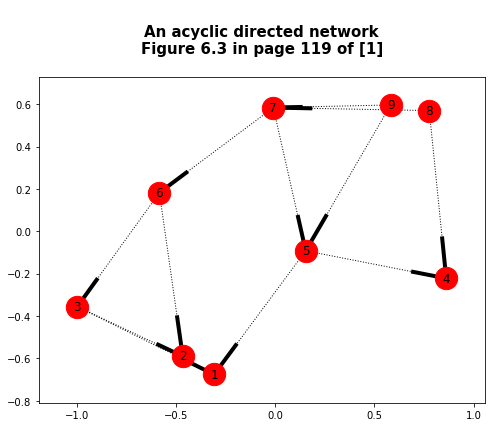

In [129]:
# This is the matrix (6.13) in page 121 of [1].
A = np.matrix([[0, 0, 1, 0, 1, 0, 0, 0, 0],
               [0, 0, 1, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 1, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 1, 1],
               [0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0]])

# We need to transpose the above matrix because networkx and [1] have different definitions about directions:
A = np.transpose(A)

# Now I want to reproduce the directed graph shown in Figure 6.13, page 119, which corresponds to the above 
# matrix A. Create the directed graph object.
DiG = nx.DiGraph()

# Make the vertices and edges from A.
nx.from_numpy_matrix(A, create_using=DiG)

# Let's rename the nodes.
old_labels = np.array(DiG.nodes())     # Goes from 0 to 8.
new_labels = np.array(DiG.nodes()) + 1 # Goes from 1 to 9.
rename_mapping = dict(zip(old_labels, new_labels))
nx.relabel_nodes(DiG, rename_mapping, copy=False)

# Draw the directed graph.
plt.figure(1, figsize=(8, 6))
plt.title("\nAn acyclic directed network\nFigure 6.3 in page 119 of [1]\n", fontsize=15, fontweight='bold')
nx.draw_networkx(DiG, pos=nx.layout.kamada_kawai_layout(DiG), style='dotted', node_size=500)